In [3]:
import pandas as pd

In [176]:
def fibonacci_number(n):
    assert 0 <= n <= 65
    if n <= 1:
        return n
    f_list = list(range(0, n+1))
    f_list[0] = 0
    f_list[1] = 1
    for i in range(2, n+1):
        f_list[i] = f_list[i-1] + f_list[i-2]
    return f_list[n]

In [2]:
def last_digit_of_fibonacci_number(n):
    assert 0 <= n <= 10 ** 7
    if n <= 1:
        return n
    f_list = list(range(0, n+1))
    f_list[0] = 0
    f_list[1] = 1

    for i in range(2, n+1):
        f_list[i] = f_list[i-1] % 10 + f_list[i-2] % 10
    return f_list[n] % 10

In [53]:
def last_digit_of_the_sum_of_fibonacci_numbers_naive(n):
    assert 0 <= n <= 10 ** 18

    if n <= 1:
        return n

    fibonacci_numbers = [0] * (n + 1)
    fibonacci_numbers[0] = 0
    fibonacci_numbers[1] = 1
    for i in range(2, n + 1):
        fibonacci_numbers[i] = fibonacci_numbers[i - 2] + fibonacci_numbers[i - 1]

    return sum(fibonacci_numbers) % 10

In [ ]:
def last_digit_of_the_sum_of_fibonacci_numbers_naive(n):
    assert 0 <= n <= 10 ** 18

    if n <= 1:
        return n

    fibonacci_numbers = [0] * (n + 1)
    fibonacci_numbers[0] = 0
    fibonacci_numbers[1] = 1
    for i in range(2, n + 1):
        fibonacci_numbers[i] = fibonacci_numbers[i - 2] + fibonacci_numbers[i - 1]

    return sum(fibonacci_numbers) % 10

In [238]:
def last_digit_of_the_sum_of_fibonacci_numbers_new(from_index,to_index):
    if to_index <= 1:
        return to_index
    from_index_sum_last = last_digit_of_the_sum_of_fibonacci_numbers(from_index - 1)
    to_index_sum_last = last_digit_of_the_sum_of_fibonacci_numbers(to_index)
    from_index_sum = sum_of_fibonacci_numbers_naive(from_index)
    to_index_sum = sum_of_fibonacci_numbers_naive(to_index)
    print("from sum:", from_index_sum)
    print("to sum:", to_index_sum)
    print("from sum last:", from_index_sum_last)
    print("to sum last:", to_index_sum_last)
    
    return (to_index_sum_last - from_index_sum_last) % 10

In [244]:
def last_digit_of_the_sum_of_fibonacci_numbers_again(from_index, to_index):
    assert 0 <= from_index <= to_index <= 10 ** 18

    if to_index <= 1:
        return to_index
    if from_index == 0:
        from_index_sum_last = from_index
    else:
        from_index_sum_last = last_digit_of_the_sum_of_fibonacci_numbers(from_index - 1)
    to_index_sum_last = last_digit_of_the_sum_of_fibonacci_numbers(to_index)

    return (to_index_sum_last - from_index_sum_last) % 10

In [239]:
last_digit_of_the_sum_of_fibonacci_numbers_new(3,5)

from sum: 4
to sum: 12
from sum last: 2
to sum last: 2


0

In [85]:
def sum_of_fibonacci_numbers_naive(n):
    if n <= 1:
        return n

    fibonacci_numbers = [0] * (n + 1)
    fibonacci_numbers[0] = 0
    fibonacci_numbers[1] = 1
    for i in range(2, n + 1):
        fibonacci_numbers[i] = fibonacci_numbers[i - 2] + fibonacci_numbers[i - 1]  
    return sum(fibonacci_numbers)

In [149]:
def p_period_length(m):
    previous, current = 0, 1
    for i in range(0, m**2):
        previous, current = current, (previous + current) % m
        if previous == 0 and current == 1:
            return i + 1

In [148]:
def fibonacci_number_again(n, m):
    assert 0 <= n <= 10 ** 18 and 2 <= m <= 10 ** 3
    p_period = p_period_length(m)
    n = n % p_period
    if n <= 1:
        return n
    previous, current = 0, 1
    for _ in range(n - 1):
        previous, current = current, (previous + current)
    return current % m

In [254]:
def generate_fibonacci(n):
    fn = []
    lasts = []
    last_sums = []
    sums = []
    last_sums = []
    sums_squares = []
    last_sums_squares = []
    for i in range (0,n+1):
        fn.append(fibonacci_number(i))
        lasts.append(last_digit_of_fibonacci_number(i))
        sums.append(sum_of_fibonacci_numbers_naive(i))
        last_sums.append(last_digit_of_the_sum_of_fibonacci_numbers_again(0,i) )
        sums_squares.append(sum_of_squares_of_fibonacci_numbers_naive(i))
        last_sums_squares.append(last_digit_of_the_sum_of_squares_of_fibonacci_numbers_naive(i))
        
    return fn, lasts, sums, last_sums, sums_squares, last_sums_squares

In [255]:
numbers, lasts, sums, last_sums, sums_squares, last_sums_squares = generate_fibonacci(10)

In [256]:
df = pd.DataFrame()
df['Fib'] = numbers
df['last digit of fib'] = lasts
df['sum of fib'] = sums
df['last digit of sum'] = last_sums
df['sum of squares'] = sums_squares
df['last digit of sum of squares'] = last_sums_squares

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

,Fib,last digit of fib,sum of fib,last digit of sum,sum of squares,last digit of sum of squares
0,0,0,0,0,0,0
1,1,1,1,1,1,1
2,1,1,2,2,2,2
3,2,2,4,4,6,6
4,3,3,7,7,15,5
5,5,5,12,2,40,0
6,8,8,20,0,104,4
7,13,3,33,3,273,3
8,21,1,54,4,714,4
9,34,4,88,8,1870,0


In [240]:
last_digit_of_the_sum_of_fibonacci_numbers_new(3,5)

from sum: 4
to sum: 12
from sum last: 2
to sum last: 2


0

In [241]:
def last_digit_of_the_sum_of_squares_of_fibonacci_numbers_naive(n):
    assert 0 <= n <= 10 ** 18

    if n <= 1:
        return n

    fibonacci_numbers = [0] * (n + 1)
    fibonacci_numbers[0] = 0
    fibonacci_numbers[1] = 1
    for i in range(2, n + 1):
        fibonacci_numbers[i] = fibonacci_numbers[i - 2] + fibonacci_numbers[i - 1]

    return sum([f ** 2 for f in fibonacci_numbers]) % 10

In [248]:
def sum_of_squares_of_fibonacci_numbers_naive(n):
    assert 0 <= n <= 10 ** 18

    if n <= 1:
        return n

    fibonacci_numbers = [0] * (n + 1)
    fibonacci_numbers[0] = 0
    fibonacci_numbers[1] = 1
    for i in range(2, n + 1):
        fibonacci_numbers[i] = fibonacci_numbers[i - 2] + fibonacci_numbers[i - 1]

    return sum([f ** 2 for f in fibonacci_numbers])

In [257]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

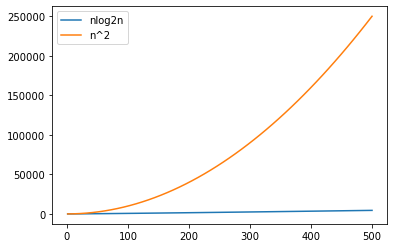

In [332]:
n = np.linspace(1, 500)
#plt.plot(n, 3 ** n, label="3^n")
plt.plot(n, n * np.log2(n), label="nlog2n")
#plt.plot(n, 2 * np.log2(n), label="log4n")
#plt.plot(n, n, label="n")
#plt.plot(n, n ** 2.231, label="5log2n")
plt.plot(n, n ** 2, label="n^2")
#plt.plot(n, n ** 0.5, label="n^0.5")
#plt.plot(n, 4 ** n, label="4^n")
plt.legend(loc='upper left')
plt.show()

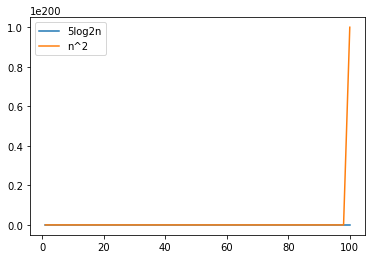

In [268]:
n = np.linspace(1, 100)


plt.legend(loc='upper left')
plt.show()